## Data visualization
- The purpose is to learn about data visualization using ggplot library

### Install packages

In [1]:
install.packages('tidyverse')
library(tidyverse)


The downloaded binary packages are in
	/var/folders/71/32h8kjzx1d957cbl0_xhpyvr0000gn/T//RtmpEPQdpB/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
options(repr.plot.width = 10, repr.plot.height = 6)
used_theme <- theme_bw(base_size = 22)

### Load data

In [3]:
mpg1 <- data.frame(mpg) # create copy of data
head(mpg1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Summary
- to get more informative summary, convert character type into factor 

In [4]:
mpg1 <- mpg1 %>% mutate_if(is.character, as.factor)
head(mpg1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [5]:
summary(mpg1)

     manufacturer                 model         displ            year     
 dodge     :37    caravan 2wd        : 11   Min.   :1.600   Min.   :1999  
 toyota    :34    ram 1500 pickup 4wd: 10   1st Qu.:2.400   1st Qu.:1999  
 volkswagen:27    civic              :  9   Median :3.300   Median :2004  
 ford      :25    dakota pickup 4wd  :  9   Mean   :3.472   Mean   :2004  
 chevrolet :19    jetta              :  9   3rd Qu.:4.600   3rd Qu.:2008  
 audi      :18    mustang            :  9   Max.   :7.000   Max.   :2008  
 (Other)   :74    (Other)            :177                                 
      cyl               trans    drv          cty             hwy       
 Min.   :4.000   auto(l4)  :83   4:103   Min.   : 9.00   Min.   :12.00  
 1st Qu.:4.000   manual(m5):58   f:106   1st Qu.:14.00   1st Qu.:18.00  
 Median :6.000   auto(l5)  :39   r: 25   Median :17.00   Median :24.00  
 Mean   :5.889   manual(m6):19           Mean   :16.86   Mean   :23.44  
 3rd Qu.:8.000   auto(s6)  :16     

### Visualization

- count plot : `geom_bar`
- category v.s. count

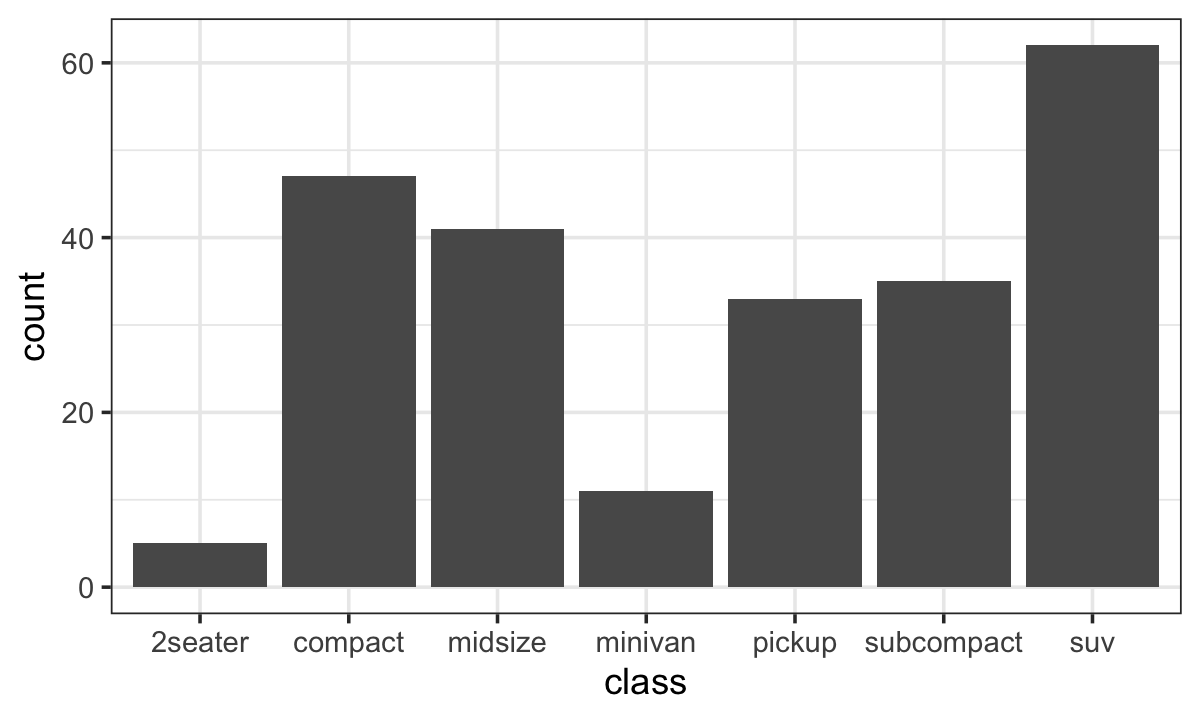

In [6]:
ggplot(data = mpg1) + 
geom_bar(mapping = aes(x = class)) + 
used_theme

- bar plot : `goem_col` 
- category v.s. numeric

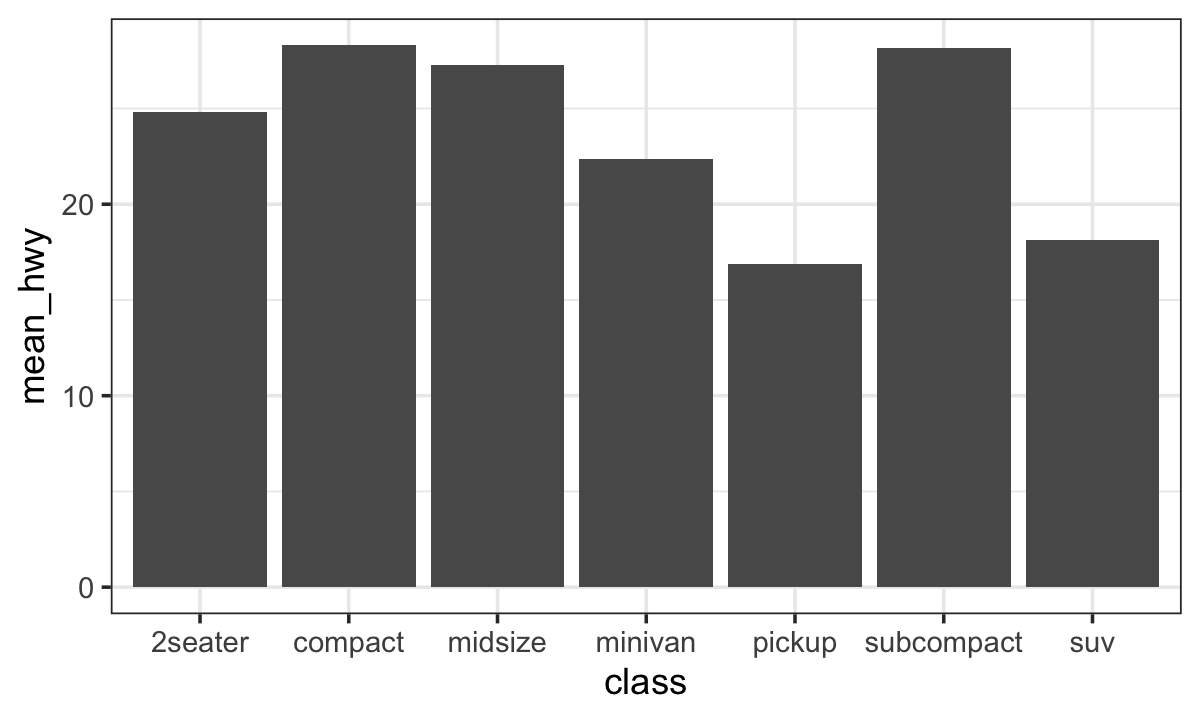

In [7]:
mpg1 %>% 
group_by(class) %>% 
summarise(mean_hwy=mean(hwy)) %>% 
ggplot() + geom_col(mapping = aes(x = class, y = mean_hwy)) + used_theme

- histogram : `geom_histogram`
- numeric v.s. count

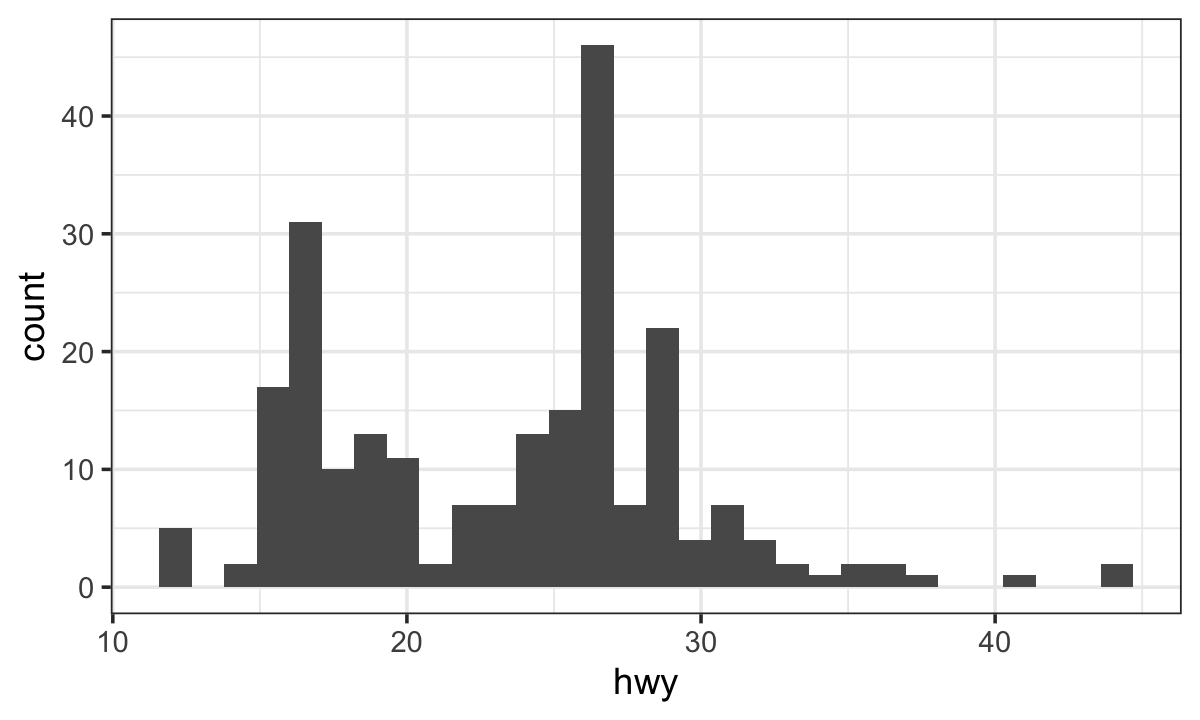

In [8]:
ggplot(mpg1) + geom_histogram(mapping = aes(x = hwy), bins = 30) + used_theme

- density : `geom_density`
- numeric v.s. probability
- area of density graph sums to 1

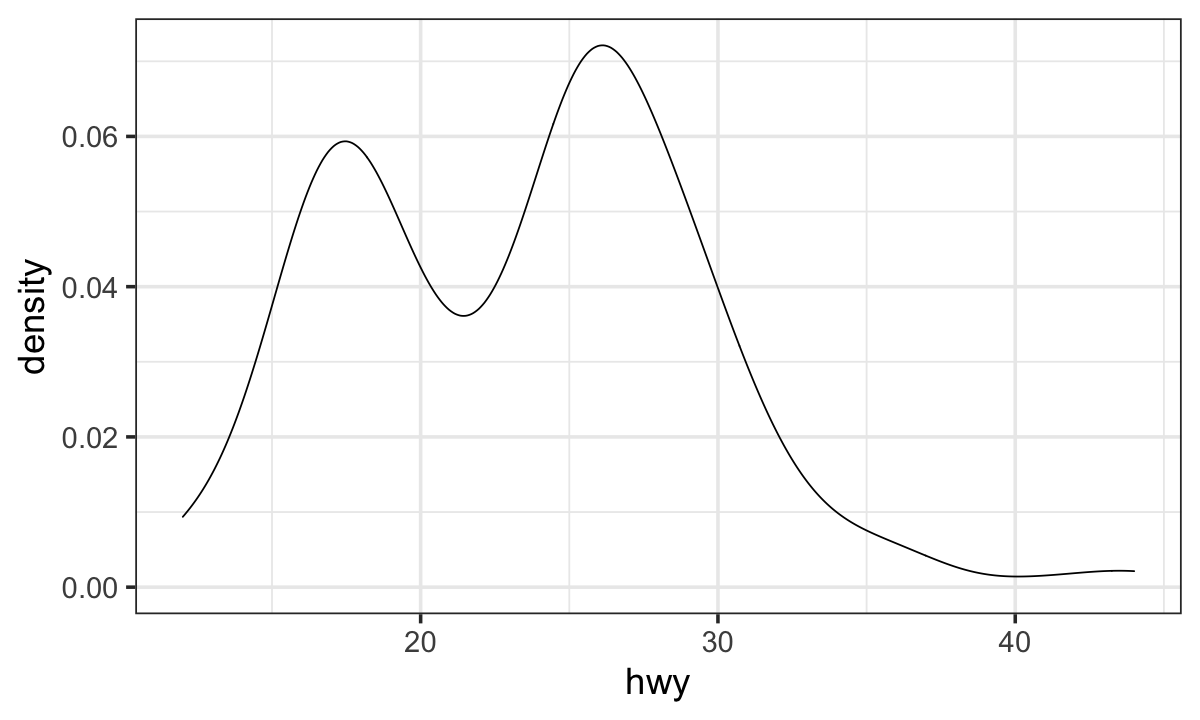

In [9]:
ggplot(mpg1) + geom_density(mapping = aes(x = hwy)) + used_theme

- area : `geom_area`
- numeric v.s. count or numeric v.s. numeric

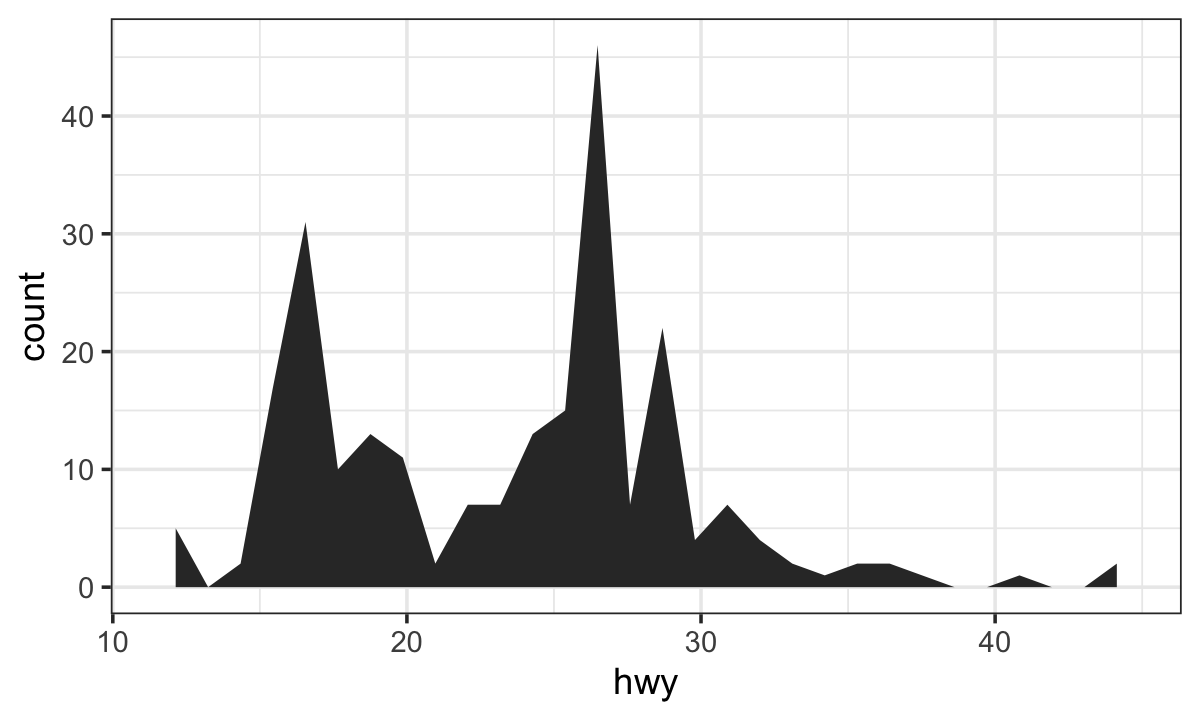

In [10]:
ggplot(mpg1) + geom_area(mapping = aes(x = hwy), stat = 'bin', bins = 30) + used_theme

- dot : `geom_dotplot`
- numeric v.s. count or category v.s. count
- count can be observed from no. of dots because the numbers on y axis are not meaningful, due to technical limitations of ggplot2

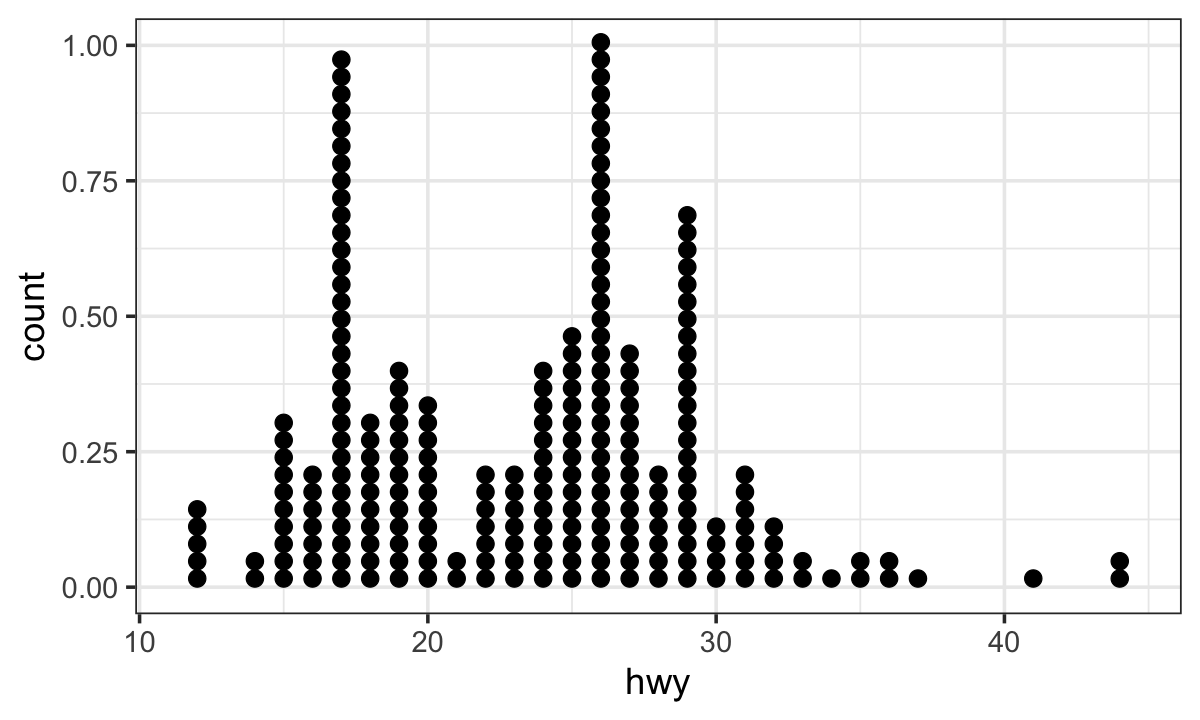

In [11]:
ggplot(mpg1) + geom_dotplot(mapping = aes(x = hwy), binwidth = 1, dotsize = 0.6) + used_theme

- boxplot : `geom_boxplot`
- emphasize outliers as dots
- category v.s. numeric

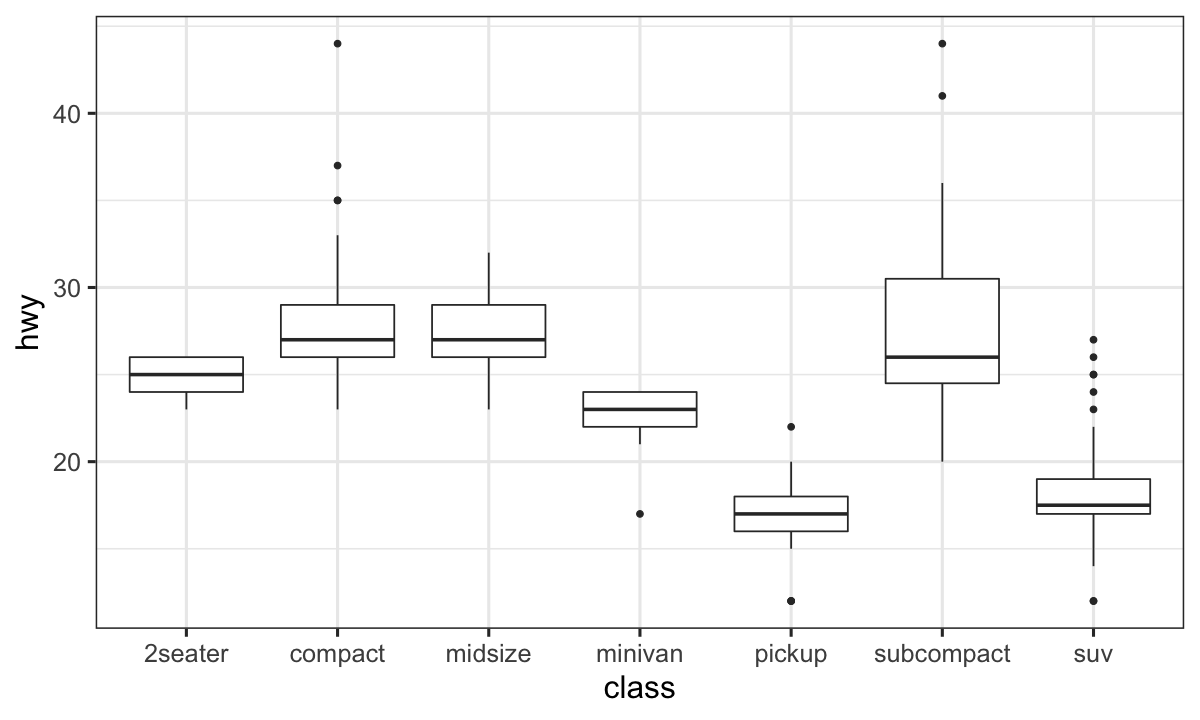

In [12]:
ggplot(mpg1) + geom_boxplot(mapping = aes(x = class, y = hwy)) + theme_bw(base_size = 19)

- violin : `geom_violin`
- category v.s. numeric
- show distribution of numeric variable separated by category

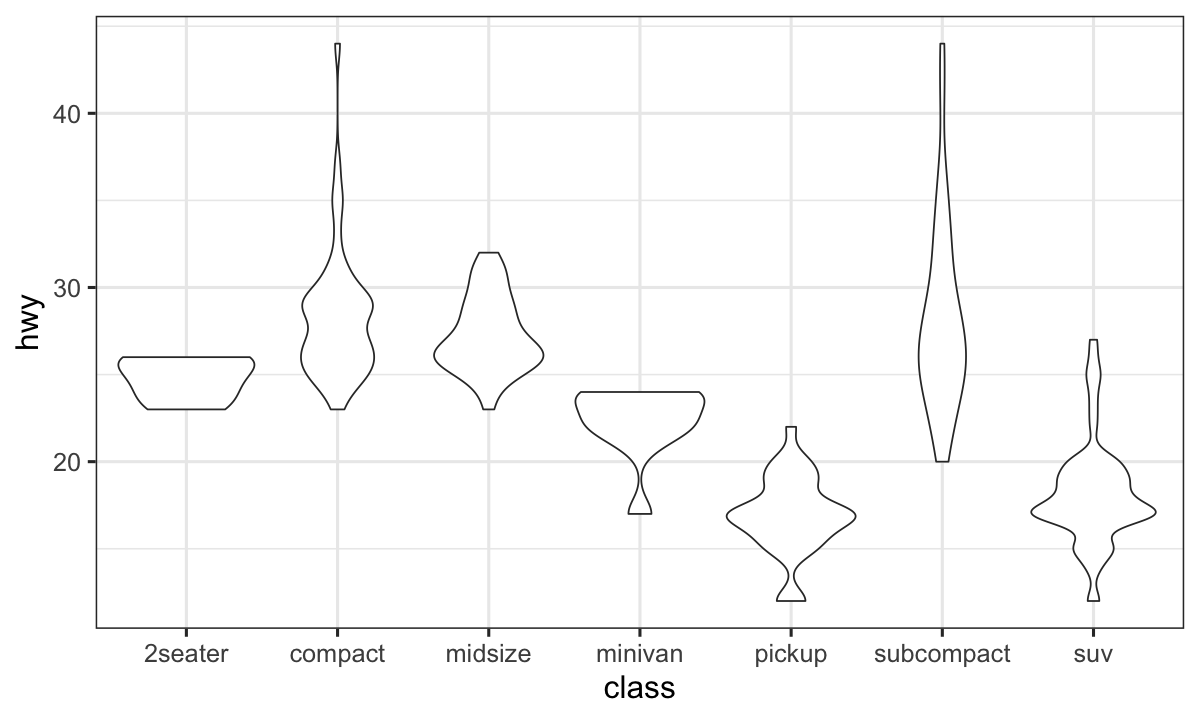

In [13]:
ggplot(mpg1) + geom_violin(mapping = aes(x = class, y = hwy)) + theme_bw(base_size = 19)

- scatter plot : `geom_point`
- numeric v.s. numeric

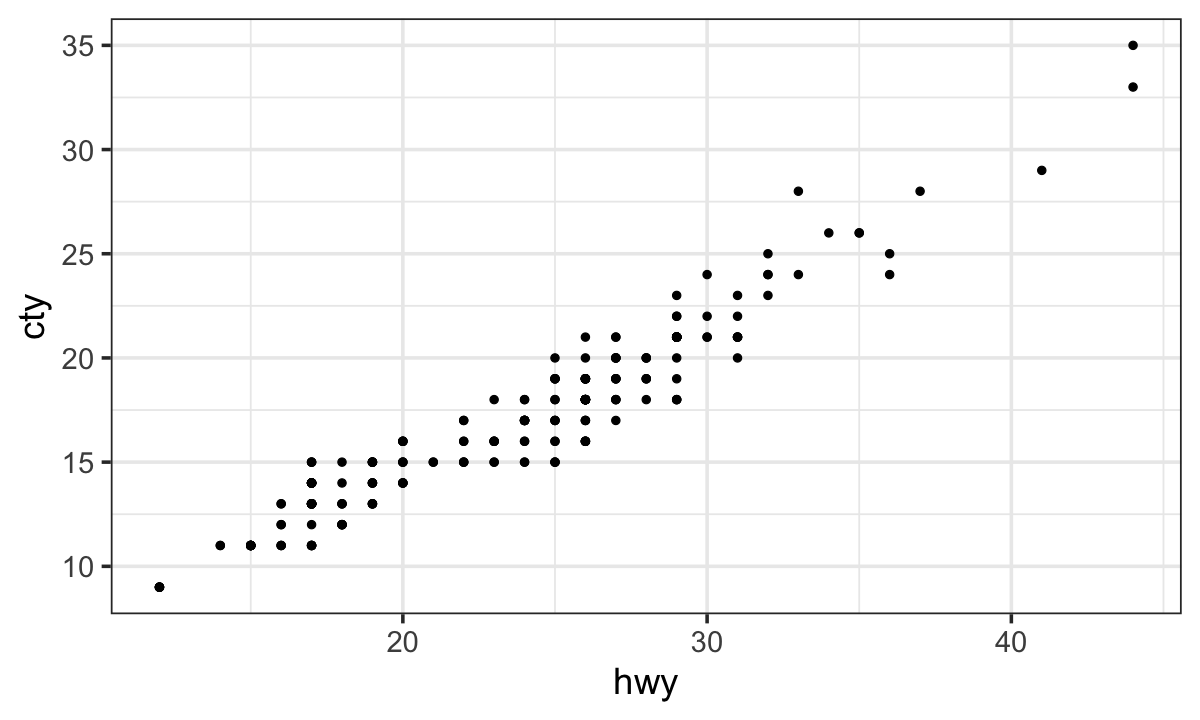

In [14]:
ggplot(mpg1) + geom_point(mapping = aes(x = hwy, y = cty), size = 2) + used_theme

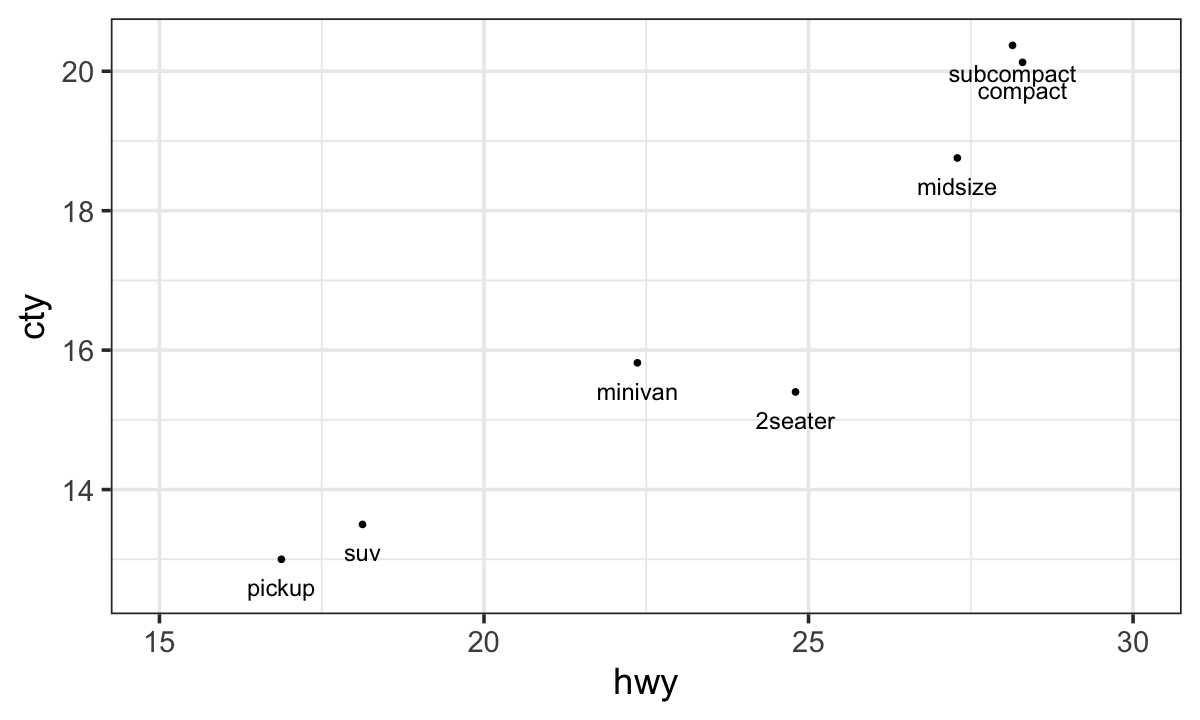

In [15]:
mpg1 %>%
group_by(class) %>%
summarise(cty = mean(cty), hwy = mean(hwy)) %>%
ggplot(aes(x = hwy, y = cty)) + geom_point() +
geom_text(aes(label = class), nudge_y = -0.4, size = 5) +
xlim(15,30) + 
used_theme

- jitter plot : `geom_jitter`
- small variation is added to the points that overlap other points
- numeric v.s. numeric

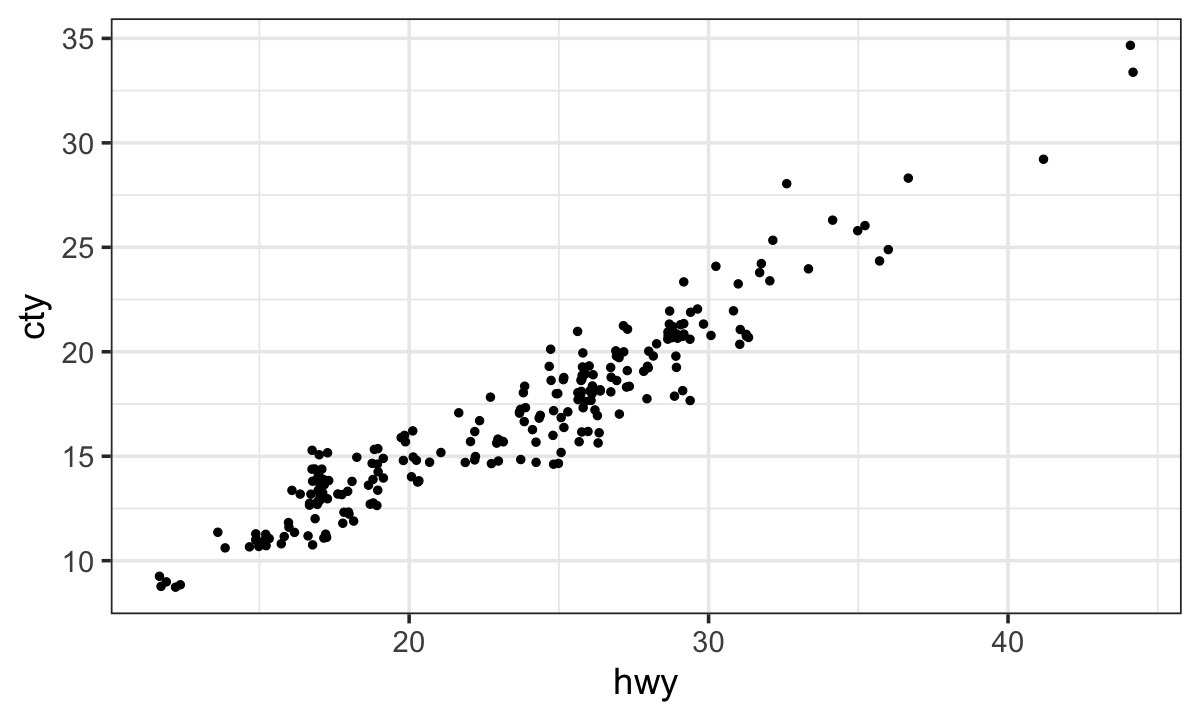

In [16]:
ggplot(mpg1) + geom_jitter(mapping = aes(x = hwy, y = cty), size = 2) + used_theme

- line : `geom_line`
- numeric v.s. numeric or time v.s numeric

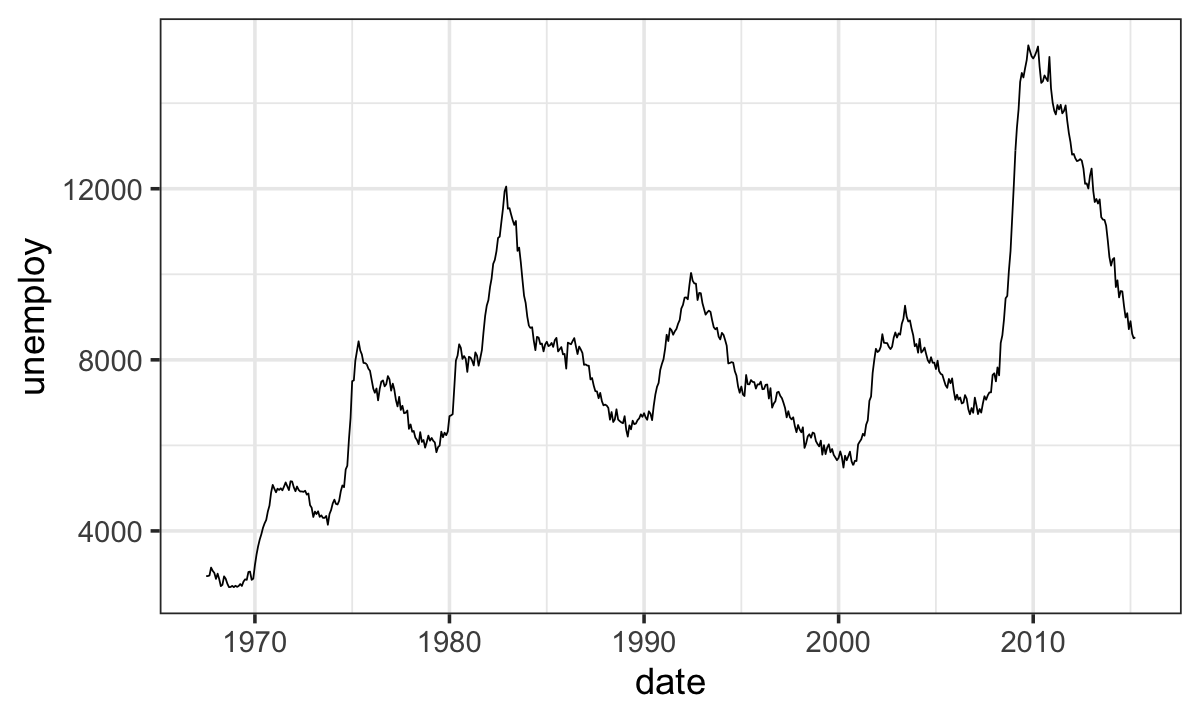

In [17]:
economics %>% 
ggplot() + 
geom_line(mapping = aes(x = date, y = unemploy)) + 
used_theme

- ribbon : `geom_ribbon`
- numeric v.s. number interval or time v.s. number interval

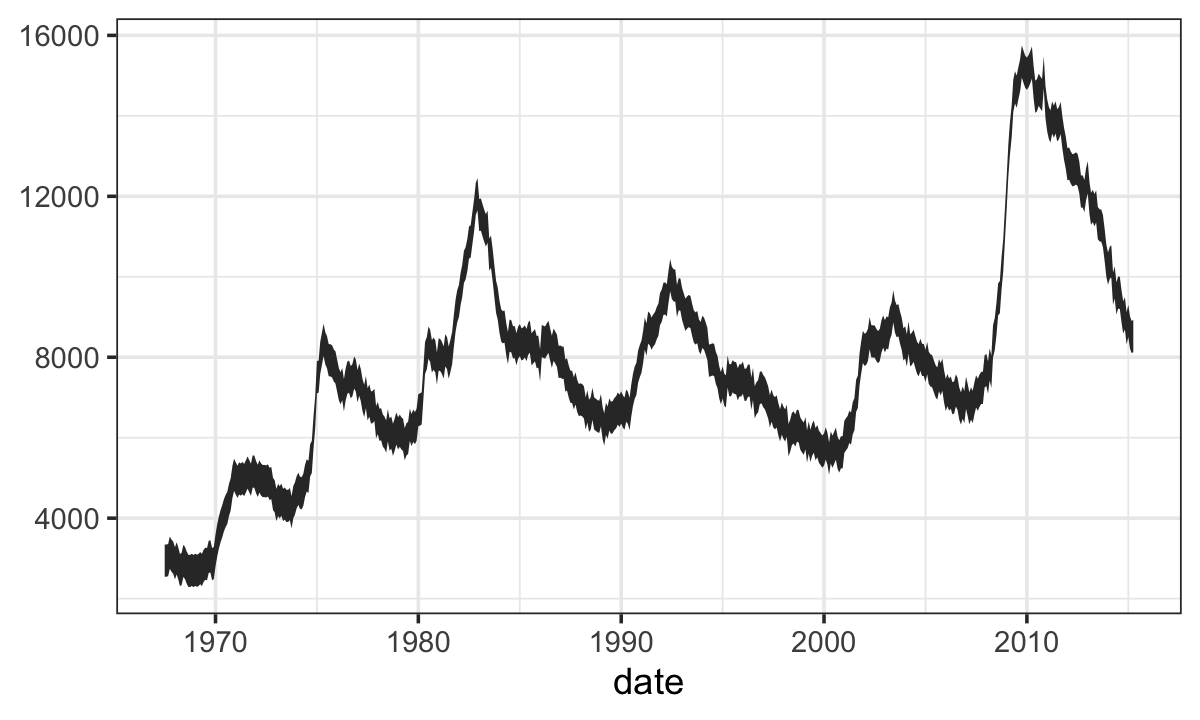

In [18]:
economics %>% ggplot() + 
geom_ribbon(mapping = aes(x = date, ymin = unemploy - 400, ymax = unemploy + 400)) + 
used_theme

- step : `geom_step`
- numeric v.s. numeric or time v.s numeric
- highlight changes in y value as x value change

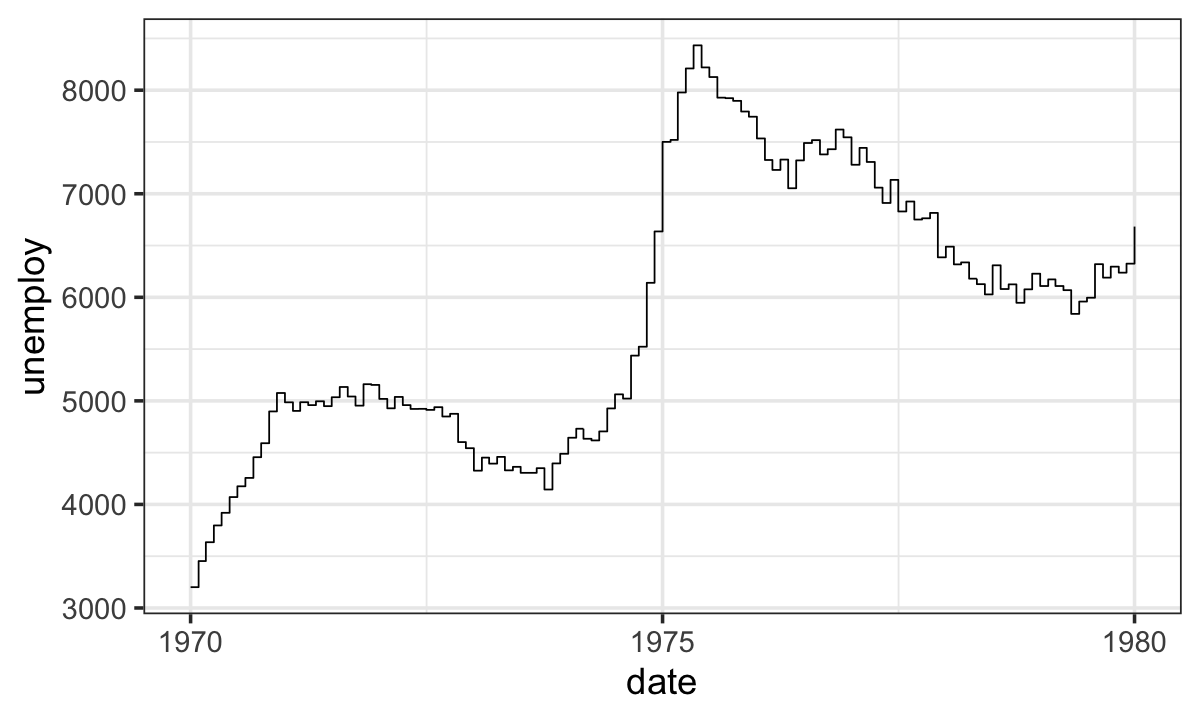

In [19]:
date_format <- '%d/%m/%Y'
start_date <- as.Date('01/01/1970', format = date_format)
end_date <- as.Date('01/01/1980', format = date_format)

economics %>% 
filter(between(date, start_date, end_date)) %>% 
ggplot(aes(x = date, y = unemploy)) + geom_step(direction = 'hv') + used_theme

- customization
    - color palette
    - axis label
    - title
    - theme

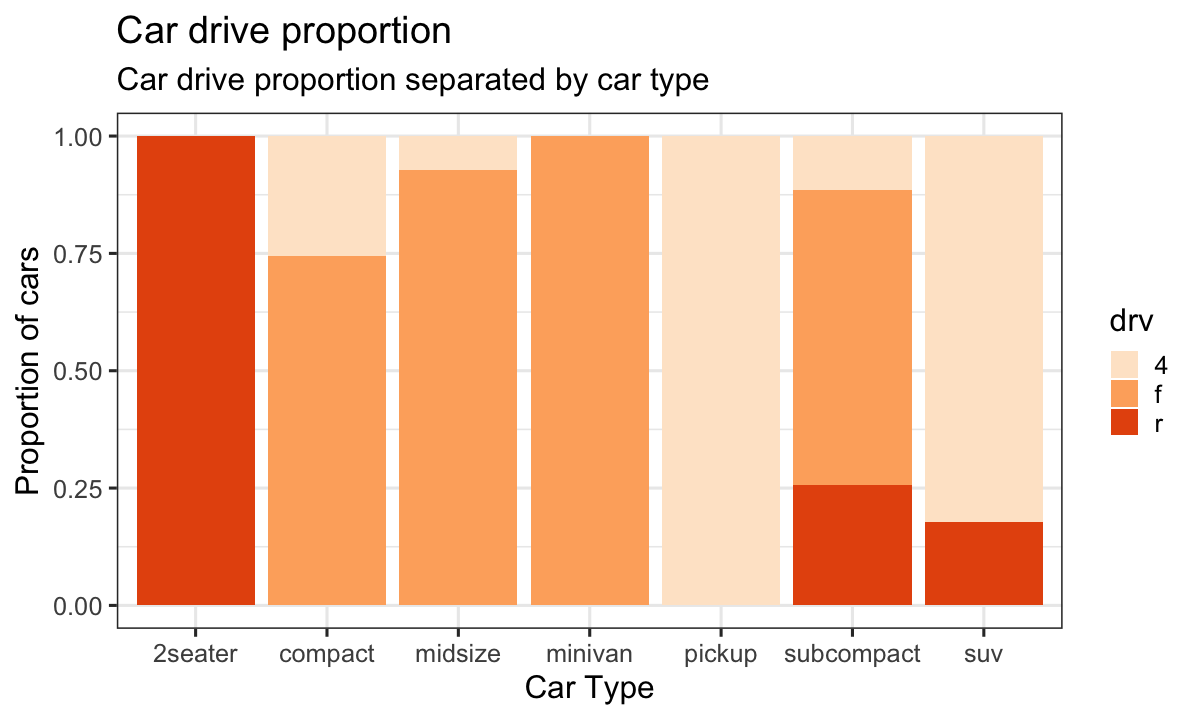

In [20]:
ggplot(mpg) +
geom_bar(aes(x = class, fill = drv), position = 'fill') +
scale_fill_brewer(palette = 'Oranges') +
xlab('Car Type') +
ylab('Proportion of cars') +
ggtitle('Car drive proportion', subtitle = 'Car drive proportion separated by car type') +
theme_bw(base_size = 19)